<a href="https://colab.research.google.com/github/Giovanik03/Analiysis-Everpeak/blob/main/EverPeak_Sprint_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EverPeak

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/datasets/everpeak_retail.csv")

Conteo de valores faltantes por columna
Objetivo: Contar cuántos valores faltantes tiene cada variable de segmentación y ubicación, usando sumas, no porcentajes.

In [ ]:
#Información general del Dataset
df.info()

#Cálcular valores faltantes en variables relevantes
payment_missing = df["payment_method"].isna().sum()
city_missing = df["city"].isna().sum()
state_missing = df["state"].isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5008 non-null   int64  
 1   order_date        5000 non-null   object 
 2   customer_id       5008 non-null   int64  
 3   product_category  5008 non-null   object 
 4   price             5008 non-null   int64  
 5   quantity          5008 non-null   int64  
 6   order_value       5008 non-null   int64  
 7   payment_method    5008 non-null   object 
 8   city              4908 non-null   object 
 9   state             4908 non-null   object 
 10  customer_age      4858 non-null   float64
dtypes: float64(1), int64(5), object(5)
memory usage: 430.5+ KB


In [ ]:
#Resultados por variable
print("payment_method missing:", payment_missing)
print("city missing:", city_missing)
print("state missing:", state_missing)

payment_method missing: 0
city missing: 100
state missing: 100


Formato de fecha en columna, limpieza y homogenización

In [ ]:
df["order_date"] =pd.to_datetime(df["order_date"], errors="coerce")
invalid_year_2026_count = (df["order_date"].dt.year == 2026).sum()
missing_order_date_count = df["order_date"].isna().sum()

In [ ]:
print("order_date año 2026:", invalid_year_2026_count)
print("order_date missing:", missing_order_date_count)

order_date año 2026: 15
order_date missing: 8


 Cardinalidad de columnas clave para entender si son IDs, categorías o variables poco útiles.

In [ ]:
customer_id_unicos = df["customer_id"].nunique()
payment_unicos =  df["payment_method"].nunique()
city_unicos =  df["city"].nunique()
state_unicos =  df["state"].nunique()

In [ ]:
print("customer_id nunique:", customer_id_unicos)
print("payment_method nunique:", payment_unicos)
print("city nunique:", city_unicos)
print("state nunique:", state_unicos)

customer_id nunique: 1829
payment_method nunique: 4
city nunique: 10
state nunique: 9


Evaluar si el missing de city depende de alguna variable del negocio.

In [ ]:
missing_city_by_pay = df['city'].isna().groupby(df['payment_method']).mean().sort_values(ascending=False)
print(missing_city_by_pay)

payment_method
credit_card    0.021517
debit_card     0.021300
cash           0.020101
paypal         0.015319
Name: city, dtype: float64


Calculando la media o promedio de "order_value" después de eliminar las filas con missing usando dropna().

In [ ]:
before = df['order_value'].mean() # calcula la media original aquí
df["order_value_imputed"] = df['order_value'].fillna(df['order_value'].median()) # tu código para imputar aquí
after = df["order_value_imputed"].mean() # calcula la media después de imputar aquí

print(before)
print(after)

10071.564696485622
10071.564696485622


Calculando la media original, la media imputando mediana, y la media imputando media.
Elección de estrategia comercial

In [ ]:
before = df['customer_age'].mean()


df["customer_age_med"] = df['customer_age'].fillna(df['customer_age'].median())
after_med = df["customer_age_med"].mean()

df["customer_age_mean"] = df['customer_age'].fillna(df['customer_age'].mean())
after_mean = df["customer_age_mean"].mean()

print(before)
print(after_med)
print(after_mean)

43.72869493618773
43.88658146964856
43.728694936187736


Conversión a tipo numérico a un conjunto de columnas

In [ ]:
def convertir_columnas_numericas(df, columnas):
    for col in columnas:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    return df

In [ ]:
columnas_numericas = ["price", "quantity", "order_value"]
df = convertir_columnas_numericas(df, columnas_numericas)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             5008 non-null   int64         
 1   order_date           5000 non-null   datetime64[ns]
 2   customer_id          5008 non-null   int64         
 3   product_category     5008 non-null   object        
 4   price                5008 non-null   int64         
 5   quantity             5008 non-null   int64         
 6   order_value          5008 non-null   int64         
 7   payment_method       5008 non-null   object        
 8   city                 4908 non-null   object        
 9   state                4908 non-null   object        
 10  customer_age         4858 non-null   float64       
 11  order_value_imputed  5008 non-null   int64         
 12  customer_age_med     5008 non-null   float64       
 13  customer_age_mean    5008 non-nul

Demostrar la escalabilidad del enfoque: agregar una nueva columna y aplicar la misma función sin reescribir código.

In [ ]:
def convertir_columnas_numericas(df, columnas):
    for col in columnas:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    return df

columnas_numericas = ["price", "quantity", "order_value"]
columnas_numericas.append("customer_id")

df = convertir_columnas_numericas(df, columnas_numericas)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             5008 non-null   int64         
 1   order_date           5000 non-null   datetime64[ns]
 2   customer_id          5008 non-null   int64         
 3   product_category     5008 non-null   object        
 4   price                5008 non-null   int64         
 5   quantity             5008 non-null   int64         
 6   order_value          5008 non-null   int64         
 7   payment_method       5008 non-null   object        
 8   city                 4908 non-null   object        
 9   state                4908 non-null   object        
 10  customer_age         4858 non-null   float64       
 11  order_value_imputed  5008 non-null   int64         
 12  customer_age_med     5008 non-null   float64       
 13  customer_age_mean    5008 non-nul

Crear una función que limpie varias columnas categóricas al mismo tiempo

In [ ]:
print(df.head())
def step_strip_text(df):
    columnas = ["product_category", "city", "state"]
    for col in columnas:
     df[col] = df[col].str.strip()
    return df
df = step_strip_text(df)
print(df.head())

   order_id order_date  customer_id product_category  price  quantity  \
0         1 2024-02-02         2616           Sports    269        50   
1         2 2024-10-10         1736          Grocery     66         0   
2         3 2024-08-27         2543           Sports    267         0   
3         4 2024-06-09         2252             Toys    114       125   
4         5 2024-06-07         1583          Fashion    729        16   

   order_value payment_method         city state  customer_age  \
0        13385    credit_card     New York    NY          66.0   
1          660     debit_card  Los Angeles    CA          24.0   
2         5073    credit_card      Chicago    IL          23.0   
3        14290    credit_card     New York    NY          70.0   
4        11754    credit_card      Houston    TX          75.0   

   order_value_imputed  customer_age_med  customer_age_mean  
0                13385              66.0               66.0  
1                  660              24.0

Función para reemplazar Sentinels
Objetivo: : Crear una función básica que reemplace valores centinela por NaN en una columna específica.

In [ ]:
# Crear función
def reemplazar_sentinels (df, sentinels):
    df["customer_age"] = df["customer_age"].replace(sentinels, pd.NA)
    return df


In [ ]:
# observar valores ausentes iniciales
print("Valores ausentes", df["customer_age"].isna().sum())

# Fijar valores a corregir
valores_erroneos = [-999, 999, 0, -1]

# Aplicar función, guardar resultados y observar cambios
df =  reemplazar_sentinels(df, valores_erroneos)
print("Valores ausentes", df["customer_age"].isna().sum())

Valores ausentes 150
Valores ausentes 175


Mejorar función para reemplazar Sentinels
Objetivo: Mejorar la función anterior para que pueda trabajar con múltiples columnas numéricas usando un bucle.

In [ ]:
 # Crear función mejorada
def reemplazar_sentinels(df, sentinels,numeric_cols):
  for col in numeric_cols:
        df[col] = df[col].replace(sentinels, pd.NA)
  return df

In [ ]:
# observar valores ausentes iniciales
print("Valores ausentes iniciales:")
print(df[["customer_age", "price"]].isna().sum())

# Fijar valores a corregir y columnas
valores_erroneos = [-999, 999, 0, -1]
columnas_numericas = ["customer_age", "price"]

# Aplicar función y observar cambios
df = reemplazar_sentinels(df, valores_erroneos, columnas_numericas) # tu código aquí
print("\nValores ausentes después:")
print(df[["customer_age", "price"]].isna().sum())

Valores ausentes iniciales:
customer_age    175
price             0
dtype: int64

Valores ausentes después:
customer_age    175
price             2
dtype: int64


Función para rellenar ausentes
Objetivo: Crear una función que convierta columnas a tipo numérico y rellene valores ausentes con el promedio.

In [ ]:
# Crear función
def rellenar_ausentes(df, cols_fill):
    # bucle para recorrer columnas
    for col in cols_fill:
        # tu código aquí: convertir a numérico
            df[col] = pd.to_numeric(df[col], errors="coerce")
        # tu código aquí: rellenar con promedio usando inplace=True
            mean = df[col].mean()
            df[col].fillna(df[col].mean(), inplace=True)
    return df

In [ ]:
# observar valores ausentes iniciales
print("Valores ausentes iniciales:")
print(df[["customer_age", "price"]].isna().sum())

# Definir columnas a rellenar
columnas_rellenar = ["customer_age", "price"]

# Aplicar función y observar cambios
df = rellenar_ausentes(df, columnas_rellenar)
print("\nValores ausentes después:")
print(df[["customer_age", "price"]].isna().sum())

Valores ausentes iniciales:
customer_age    175
price             2
dtype: int64

Valores ausentes después:
customer_age    0
price           0
dtype: int64


Crear Pipeline de limpieza
Objetivo: Crear una función pipeline que orqueste todas las funciones de limpieza en el orden correcto.

In [ ]:
# Funciones auxiliares (ya creadas en tasks anteriores)
def reemplazar_sentinels(df, sentinels, numeric_cols):
    for col in numeric_cols:
        df[col] = df[col].replace(sentinels, pd.NA)
    return df

def rellenar_ausentes(df, cols_fill):
    for col in cols_fill:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Crear función pipeline
def limpiar_df(df):
    #definir valores_erroneos
    valores_erroneos= (-999, 999, 0, 1)
    #definir columnas_numericas
    columnas_numericas= ("customer_age", "price")
    df = reemplazar_sentinels(df,valores_erroneos,columnas_numericas)# tu código aquí: aplicar reemplazar_sentinels
    #aplicar rellenar_ausentes
    df = rellenar_ausentes(df, columnas_numericas)
    return df

In [ ]:
# observar valores ausentes iniciales
print("Valores ausentes iniciales:")
print(df[["customer_age", "price"]].isna().sum())

# Aplicar pipeline completo
df = limpiar_df(df)
print("\nValores ausentes después del pipeline:")
print(df[["customer_age", "price"]].isna().sum())

Valores ausentes iniciales:
customer_age    0
price           0
dtype: int64

Valores ausentes después del pipeline:
customer_age    0
price           0
dtype: int64


Desempeño de las categorías Fashion y Sports para entender su situación actual y detectar posibles anomalías en los datos.

In [ ]:
# Crear dataframes para cada categoría
df_fashion = df[df["product_category"] == "Fashion"]
df_sports = df[df["product_category"] == "Sports"]

#Resumen de columnas numéricas
columnas_numericas = ['order_value', 'customer_age', 'price', 'quantity']
print('Resumen estadístico de la categoría Fashion')
print(df_fashion[['order_value', 'customer_age', 'price', 'quantity']].describe())
print()
print('Resumen estadístico de la categoría Sports')
print(df_sports[['order_value', 'customer_age', 'price', 'quantity']].describe())

Resumen estadístico de la categoría Fashion
         order_value  customer_age         price    quantity
count     740.000000    740.000000    740.000000  740.000000
mean     8741.775676     48.034392    585.240663   15.164865
std     10312.376778     18.096992    655.100389   30.697218
min       122.000000     18.000000     25.000000    0.000000
25%      2916.000000     32.000000    274.750000    0.000000
50%      8077.500000     47.000000    457.000000    0.000000
75%     12526.500000     64.000000    679.000000   21.000000
max    224884.000000     80.000000  11836.000000  284.000000

Resumen estadístico de la categoría Sports
        order_value  customer_age        price    quantity
count    704.000000    704.000000   704.000000  704.000000
mean   10348.357955     49.689850   840.862216   12.869318
std     8815.365733     17.451683   848.098975   26.434814
min      195.000000     18.000000    47.000000    0.000000
25%     4301.500000     36.000000   347.000000    0.000000
50%    10

Comparanda la media y la mediana de la columna order_value para evaluar si hay valores extremos influyendo en el análisis

In [ ]:
# Filtrar la categoría Grocery
df_grocery = df[df["product_category"] == "Grocery"]

# Calcular media y mediana del gasto
promedio = df_grocery["order_value"].mean()
mediana = df_grocery["order_value"].median()

# Mostrar resultados
print("Promedio del gasto en Grocery:", promedio)
print("Mediana del gasto en Grocery:", mediana)

# Interpretación según comparación de media y mediana
print("El promedio está afectado por outliers o valores atípicos en Grocery.")

Promedio del gasto en Grocery: 6943.137426900585
Mediana del gasto en Grocery: 4131.0
El promedio está afectado por outliers o valores atípicos en Grocery.


Comparar la  media y la mediana de la columna quantity para evaluar si los valores extremos están afectando el análisis de la cantidad típica comprada por los clientes.

In [ ]:
#Dataset limpio para el análisis
df = pd.read_csv('/datasets/everpeak_clean.csv')

# Promedio y mediana de quantity
print("Promedio de quantity: ", df["quantity"].mean())
print("Mediana de quantity: ", df["quantity"].median())
print("El promedio está afectado por los outliers o valores atípicos.")

Promedio de quantity:  32.3598
Mediana de quantity:  14.0
El promedio está afectado por los outliers o valores atípicos.


Comportamiento de los clientes en las ciudades New York y Los Angeles, para comprender su situación actual y detectar posibles anomalías en los datos.

In [ ]:
# Crear dataframes para cada categoría
df_ny = df[df["city"] == "New York"]
df_la = df[df["city"] == "Los Angeles"]
#Resumen de columnas numéricas
columnas_numericas = ['order_value', 'customer_age', 'price', 'quantity']
print('Resumen estadístico de la ciudad New York')
print(df_ny[columnas_numericas].describe())
print()
print('Resumen estadístico de la ciudad Los Angeles')
print(df_la[columnas_numericas].describe())

Resumen estadístico de la ciudad New York
         order_value  customer_age         price     quantity
count     497.000000    497.000000    497.000000   497.000000
mean    10545.410463     49.847082    741.454728    40.800805
std     13914.329615     17.507624   1105.570500   147.484959
min        58.000000     18.000000     12.000000     1.000000
25%      2862.000000     35.000000    203.000000     8.000000
50%     10682.000000     49.000000    457.000000    14.000000
75%     13327.000000     64.000000    787.000000    24.000000
max    224884.000000     80.000000  11836.000000  2083.000000

Resumen estadístico de la ciudad Los Angeles
         order_value  customer_age         price     quantity
count     510.000000    510.000000    510.000000   510.000000
mean    10449.945098     49.741176    751.674510    39.511765
std     15979.195581     17.670518   1175.722235   128.503594
min        44.000000     18.000000     13.000000     1.000000
25%      3160.500000     35.000000    202.50

Distribución de los métodos de pago y las categorías de producto en Nueva York y Chicago

In [ ]:
df = pd.read_csv('/datasets/everpeak_clean.csv')

#  Columnas categóricas
columnas_categoricas = ['payment_method', 'product_category']

# Filtrado por ciudad
df_ny = df[df["city"] == "New York"]
df_chicago = df[df["city"] == "Chicago"]

# Resumen categórico New York
print("Resumen categórico - New York")
print(df_ny[columnas_categoricas].describe())

print() # salto de línea

# Resumen categórico Chicago
print("Resumen categórico - Chicago")
print(df_chicago[columnas_categoricas].describe())

Resumen categórico - New York
       payment_method product_category
count             497              497
unique              4                8
top       credit_card             Toys
freq              271               76

Resumen categórico - Chicago
       payment_method product_category
count             482              482
unique              4                8
top       credit_card             Toys
freq              284               74


Revisar todas las categorías de una columna junto con su frecuencia y calcular también los porcentajes.

In [ ]:
columnas_categoricas = ['product_category', 'payment_method', 'city', 'state']

#Distribución completa de columnas categóricas usando for
for col in columnas_categoricas:
    print(col)
    print("Frecuencia absoluta")
    print(df[col].value_counts())
    print("Frecuencia relativa")
    print(df[col].value_counts(normalize=True))
    print()

product_category
Frecuencia absoluta
Fashion        739
Electronics    735
Beauty         721
Toys           715
Sports         702
Grocery        684
Home           679
?               25
Name: product_category, dtype: int64
Frecuencia relativa
Fashion        0.1478
Electronics    0.1470
Beauty         0.1442
Toys           0.1430
Sports         0.1404
Grocery        0.1368
Home           0.1358
?              0.0050
Name: product_category, dtype: float64

payment_method
Frecuencia absoluta
credit_card    2737
paypal         1175
debit_card      889
cash            199
Name: payment_method, dtype: int64
Frecuencia relativa
credit_card    0.5474
paypal         0.2350
debit_card     0.1778
cash           0.0398
Name: payment_method, dtype: float64

city
Frecuencia absoluta
Seattle          513
Houston          513
Los Angeles      510
New York         497
Miami            493
Phoenix          491
Chicago          482
Boston           474
San Francisco    467
Denver           460
unknown

Distribución de los métodos de pago y las ciudades asociadas a la categoría Toys

In [ ]:
# Columnas categóricas
columnas_categoricas = ['payment_method', 'city']

# Filtra por categoría
df_toys = df[df["product_category"] == "Toys"]

# Resumen categórico Toys
print("Resumen categórico - Toys")
print(df_toys[columnas_categoricas].describe())

Resumen categórico - Toys
       payment_method     city
count             715      715
unique              4       11
top       credit_card  Seattle
freq              383       81


Revisión de todas las ciudades asociadas a la categoría Sports, mostrando su frecuencia absoluta y su frecuencia relativa

In [ ]:
# Filtra por categoría
df_sports = df[df["product_category"] == "Sports"]

# Distribución de city
print("Frecuencia absoluta")
print(df["city"].value_counts())
print("\nFrecuencia relativa")
print(df["city"].value_counts(normalize=True))

Frecuencia absoluta
Seattle          513
Houston          513
Los Angeles      510
New York         497
Miami            493
Phoenix          491
Chicago          482
Boston           474
San Francisco    467
Denver           460
unknown          100
Name: city, dtype: int64

Frecuencia relativa
Seattle          0.1026
Houston          0.1026
Los Angeles      0.1020
New York         0.0994
Miami            0.0986
Phoenix          0.0982
Chicago          0.0964
Boston           0.0948
San Francisco    0.0934
Denver           0.0920
unknown          0.0200
Name: city, dtype: float64


Analizando la distribución de precios

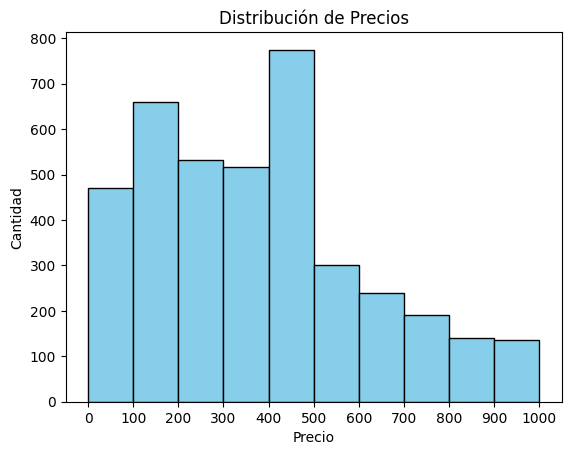

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/everpeak_clean.csv')

# Graficar histograma
counts, bin_edges, _ = plt.hist(df['price'], bins=10, range=(0, 1000), color='skyblue', edgecolor='black')
plt.xticks(bin_edges)

# Etiquetas y título del gráfico
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Distribución de Precios")
plt.show()

Distribución de edades de clientes

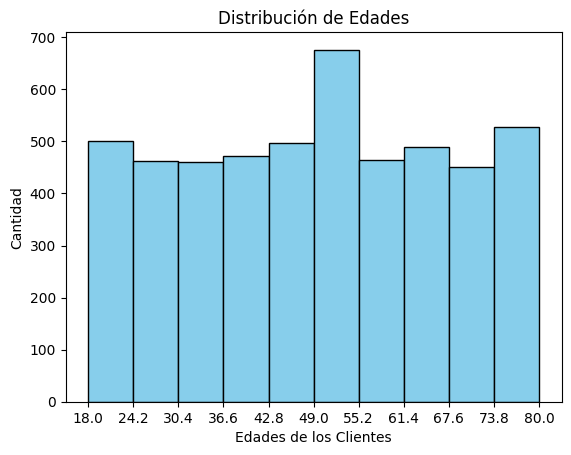

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/everpeak_clean.csv')

# Graficar histograma
counts, bin_edges, _ = plt.hist((df['customer_age']), color='skyblue', bins=10, edgecolor='black')
plt.xticks(bin_edges)

# Etiquetas y título del gráfico
plt.xlabel("Edades de los Clientes")
plt.ylabel("Cantidad")
plt.title("Distribución de Edades")
plt.show()

Analizando la distribución de precios

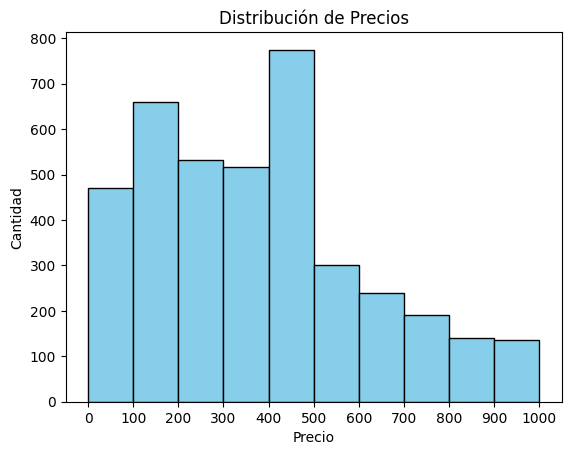

In [ ]:
# Graficar histograma
counts, bin_edges, _ = plt.hist(df['price'], bins=10, range=(0,1000), color='skyblue', edgecolor='black')

# Mostrar las marcas de los bins en el eje X
plt.xticks(bin_edges)

# Etiquetas y título del gráfico
plt.xlabel("Precio")
plt.ylabel("Cantidad")
plt.title("Distribución de Precios")
plt.show()

Explorando la dispersión de cantidades con Boxplot

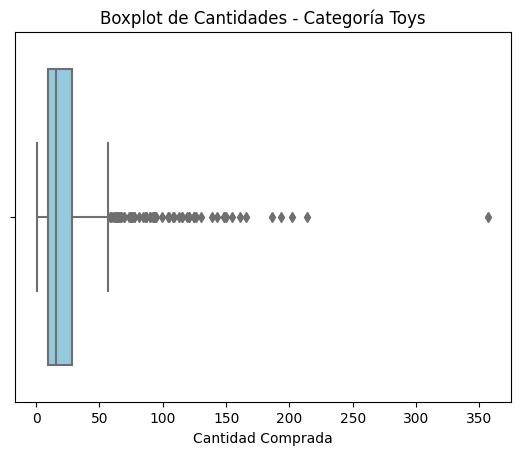

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datasets/everpeak_clean.csv')
df_toys = df[df['product_category'] == 'Toys']

# Graficar BoxPlot
sns.boxplot(x=df_toys['quantity'], color='skyblue')

# Etiquetas y título del gráfico
plt.xlabel("Cantidad Comprada")
plt.title('Boxplot de Cantidades - Categoría Toys')
plt.show()

plt.show()


Distribución de edades de clientes

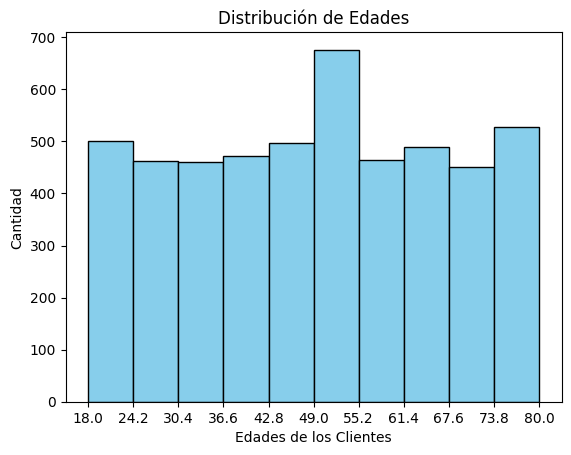

In [ ]:
# Graficar histograma
counts, bin_edges, _ = plt.hist(df['customer_age'], bins=10, color='skyblue', edgecolor='black')

# Mostrar las marcas de los bins en el eje X
plt.xticks(bin_edges)

# Etiquetas y título del gráfico
plt.xlabel("Edades de los Clientes")
plt.ylabel("Cantidad")
plt.title("Distribución de Edades")
plt.show()

Boxplot del valor total de pedidos

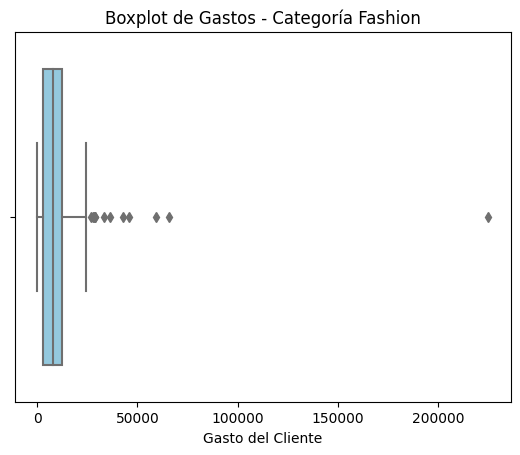

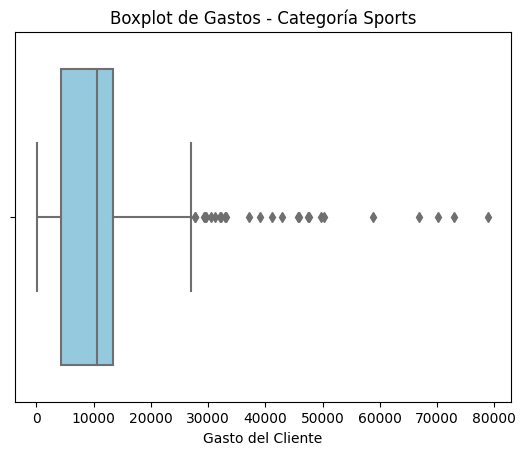

In [ ]:
# Filtrar datos
df_fashion = df[df['product_category'] == "Fashion"]
df_sports = df[df['product_category'] == "Sports"]

# BoxPlot Categoría Fashion
sns.boxplot(x=df_fashion['order_value'], color='skyblue')
plt.xlabel("Gasto del Cliente")
plt.title("Boxplot de Gastos - Categoría Fashion")
plt.show()

# BoxPlot Categoría Sports
sns.boxplot(x=df_sports['order_value'], color='skyblue')
plt.xlabel("Gasto del Cliente")
plt.title("Boxplot de Gastos - Categoría Sports")
plt.show()

Identificar outliers en order_value con IQR.

In [ ]:
# calcular Q1, Q3 e IQR
Q1 = df['order_value'].quantile(0.25)
Q3 = df['order_value'].quantile(0.75)
IQR = Q3 - Q1

# calcular límite inferior y superior
limite_inferior = Q1 - 1.5*IQR
df[df['order_value'] < limite_inferior].head()
limite_superior = Q3 + 1.5*IQR
df[df['order_value'] > limite_superior].head()

# Mostrar resultados
print('Primer cuartil: ', Q1)
print('Tercer cuartil: ', Q3)
print('IQR: ', IQR)

print("\nRegistros abajo del límite inferior")
print(df[df['order_value'] < limite_inferior])

print("\nRegistros arriba del límite superior")
print(df[df['order_value'] > limite_superior])

Primer cuartil:  3094.0
Tercer cuartil:  13160.5
IQR:  10066.5

Registros abajo del límite inferior
Empty DataFrame
Columns: [order_id, order_date, customer_id, product_category, price, quantity, order_value, payment_method, city, state, customer_age, quantity_invalid_flag, age_invalid_flag, state_missing_flag]
Index: []

Registros arriba del límite superior
      order_id  order_date  customer_id product_category  price  quantity  \
8            9  2024-03-14         2925           Beauty     55       833   
123        124  2024-06-21         1389      Electronics   1947        16   
155        156  2024-08-30         2901          Grocery     36      1278   
199        200  2024-12-18         2919          Fashion   5174         7   
265        266  2024-07-31         1905      Electronics   2897        10   
...        ...         ...          ...              ...    ...       ...   
4934      4935  2024-05-19         1502      Electronics   4282        11   
4936      4937  2024-12

Identificar outliers en order_value usando Z-Score.

In [ ]:
#cálculo de la media
mean = df['order_value'].mean()# tu código aquí

#cálculo de la desviación estándar
std = df['order_value'].std()

#Crea el z score
df['z'] =  (df['order_value'] - mean) / std
df['z'].describe()

#Calcula los valores extremos
print(df[df['z'].abs() > 3])

      order_id  order_date  customer_id product_category  price  quantity  \
293        294  2024-05-01         2149      Electronics   3336        17   
369        370  2024-10-09         2784      Electronics   5973        13   
375        376  2024-02-04         2285      Electronics   4782        20   
391        392  2024-03-06         2981      Electronics   2463        20   
397        398  2024-03-12         2024      Electronics   4893        18   
...        ...         ...          ...              ...    ...       ...   
4698      4699  2024-04-20         2059      Electronics   5227        11   
4732      4733  2024-10-06         2685           Sports   3394        14   
4908      4909  2024-10-19         1119      Electronics   3927        19   
4921      4922  2024-11-15         1621           Sports   2765        18   
4942      4943  2024-11-02         1979      Electronics   6478        11   

      order_value payment_method      city    state  customer_age  \
293   

In [ ]:
import pandas as pd
import numpy as np

#cargo los datos
df = pd.read_csv("/datasets/everpeak_clean.csv")

#calculo percentil 1 y 99
lower = df['price'].quantile(0.01)
upper = df['price'].quantile(0.99)

#crear columna con valores capados
df['price_winsor'] = np.clip(df['price'], lower, upper)

Crear una regla que indique si los clientes en general superan cierto volumen de compra.

In [ ]:
# Calcular promedio y mediana
cantidad_promedio = df["quantity"].mean()
cantidad_mediana = df["quantity"].median()
print("Promedio:", cantidad_promedio)
print("Mediana:",cantidad_mediana)
print() # salto de línea

# Segmentación con media o promedio
if cantidad_promedio > 22 :
	print("En promedio: volumen alto")
else:
	print("En promedio: volumen bajo")

# Segmentación con mediana
if cantidad_mediana > 22 :
    print("Según la mediana: volumen alto")
else:
    print("Según la mediana: volumen bajo")

Promedio: 32.3598
Mediana: 14.0

En promedio: volumen alto
Según la mediana: volumen bajo


Mejorar la regla anterior agregando una tercera categoría

In [ ]:
# Calcular promedio y mediana
cantidad_promedio = df['quantity'].mean()
cantidad_mediana = df['quantity'].median()
print("Promedio:", cantidad_promedio)
print("Mediana:",cantidad_mediana)
print()

# Segmentación con media o promedio
if cantidad_promedio > 22:
	print("En promedio: volumen alto")
elif cantidad_promedio >= 10:
    print("En promedio: volumen medio")
else:
	print("En promedio: volumen bajo")

# Segmentación con mediana
if cantidad_mediana > 22:
	print("Según la mediana: volumen alto")
elif cantidad_promedio >= 10:
    print("Según la mediana: volumen medio")

else:
	print("Según la mediana: volumen bajo")

Promedio: 32.3598
Mediana: 14.0

En promedio: volumen alto
Según la mediana: volumen medio


Segmentar a los clientes por volumen de compra

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("/datasets/everpeak_clean.csv")

# Crear columna nueva
df["volume_segment"] =np.where(df["quantity"] > 22, "High Volume", "Low Volume")

# Verificar cambios
print(df['volume_segment'].value_counts())

Low Volume     3739
High Volume    1261
Name: volume_segment, dtype: int64


Segmentar los clientes por edad y por volumen de compra

In [ ]:
def classify_volume(row):
    age = row["customer_age"]
    qty = row["quantity"]

    # 1. Manejo de valores nulos/faltantes
    if pd.isna(age) or pd.isna(qty):
        return "Error en Datos"

    #2. Segmentación de Altas Cantidades ---
    if qty > 22:
        if age > 55:
            return "Sr. High Volume"
        else:
            return "Jr. High Volume"

    #3. Segmentación Bajas Cantidades ---
    elif qty <= 22:
        if age <= 55:
            return "Jr. Low Volume"
        else: # age < 55
            return "Sr. Low Volume"

# aplicar función y verificar cambios
df["volume_segment"] = df.apply(classify_volume, axis=1)
print(df['volume_segment'].value_counts())

Jr. Low Volume     3004
Sr. High Volume    1197
Sr. Low Volume      735
Jr. High Volume      64
Name: volume_segment, dtype: int64


Segmentar las transacciones según el método de pago y el volumen de compra

In [ ]:
def classify_payment(row):
    card = row['payment_method']
    qty = row['quantity']

    # 1. Manejo de valores nulos/faltantes
    if pd.isna(card) or pd.isna(qty):
        return "Error en Datos"

    #2. Segmentación de Altas Cantidades ---
    if qty > 22:
        if card == "credit_card" or card == "debit_card":
            return "card_high_volume"
        else:
            return "no_card_high_volume"

    #3. Segmentación Bajas Cantidades ---
    elif qty <= 22:
        if card == "credit_card" or card == "debit_card":
            return "card_low_volume"
        else:
            return "no_card_low_volume"

# aplicar función y verificar cambios
df['payment_segment'] = df.apply(classify_payment, axis=1)
print(df['payment_segment'].value_counts())

card_low_volume        2704
no_card_low_volume     1035
card_high_volume        922
no_card_high_volume     339
Name: payment_segment, dtype: int64
